In [0]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from pprint import pprint
import json
from google.colab import files
import scipy.stats as stats
from matplotlib.patches import Patch
uploaded = files.upload()

Saving Elyria_Police_Department.csv to Elyria_Police_Department (2).csv
Saving Lakewood_Police_Department.csv to Lakewood_Police_Department (2).csv
Saving median_home_data.csv to median_home_data (2).csv


In [0]:
#import elyria crime data
file_1 = "Elyria_Police_Department.csv"
el_crime_data = pd.read_csv(file_1)

#import lakewood crime data
file_2 = "Lakewood_Police_Department.csv"
lw_crime_data = pd.read_csv(file_2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#recode zip +4 to regular zip and convert to float
el_crime_data['zip'] = el_crime_data['zip'].replace('44035-5622', '44305')
el_crime_data['zip'] = el_crime_data['zip'].replace('44035-2819', '44305')
el_crime_data['zip'] = el_crime_data['zip'].astype('float64') 

In [0]:
#remove unnecessary columns from lakewood data and create new dataframe
crime_data_merged = lw_crime_data.iloc[:,0:20]

#union the lakewood and elyria datasets
crime_data_merged = pd.concat([crime_data_merged,el_crime_data])

In [0]:
#create table with only needed columns and preview
crime_data_summary = crime_data_merged.iloc[:,[0,2,3,8,10,19]]

In [0]:
#extracts month and year from incident_datetime column
crime_data_summary['year'] = pd.DatetimeIndex(crime_data_summary['incident_datetime']).year
crime_data_summary['month'] = pd.DatetimeIndex(crime_data_summary['incident_datetime']).month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#remove unecessary zip codes and years using loc
crime_data_summary = crime_data_summary.loc[(crime_data_summary['zip']==44107) | (crime_data_summary['zip']==44035)]
crime_data_summary = crime_data_summary.loc[(crime_data_summary['year']<2019) & (crime_data_summary['year']>2009)]

In [0]:
#group incidents by month, year, zip
crime_data_grouped = crime_data_summary.groupby(['zip','month','year']).count().reset_index()

In [0]:
#import home data
file_3 = "median_home_data.csv"
home_data = pd.read_csv(file_3)

In [0]:
#remove unecessary zip codes using loc
home_data_summary = home_data.loc[(home_data['RegionName']==44107) | (home_data['RegionName']==44035)]

In [0]:
#transpose data frame
home_data_transp = home_data_summary.T.reset_index()

#rename columns
home_data_transp=home_data_transp.rename(index=str, columns={92: "Lakewood_Real_Estate_44107", 100: "Elyria_Real_Estate_44035"})
home_data_transp = home_data_transp.iloc[6:280,:]

home_data_transp.head()

,index,Lakewood_Real_Estate_44107,Elyria_Real_Estate_44035
6,1996_04,64,62
7,1996_05,64,62
8,1996_06,65,63
9,1996_07,65,62
10,1996_08,65,63


In [0]:
#parse index string for month and year
home_data_transp['month'] = home_data_transp['index'].str.split('_').str[1]
home_data_transp['year'] = home_data_transp['index'].str.split('_').str[0]
home_data_transp.iloc[:,[1,2,3,4]]
home_data_transp.head()

,index,Lakewood_Real_Estate_44107,Elyria_Real_Estate_44035,month,year
6,1996_04,64,62,04,1996
7,1996_05,64,62,05,1996
8,1996_06,65,63,06,1996
9,1996_07,65,62,07,1996
10,1996_08,65,63,08,1996


In [0]:
#remove columns for union / data reshaping
lakewood_stacked=home_data_transp.iloc[:,[1,3,4]]
elyria_stacked=home_data_transp.iloc[:,[2,3,4]]

#add zip as a column
lw_zip='44107'
el_zip='44035'
lakewood_stacked['zip']=lw_zip
elyria_stacked['zip']=el_zip

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#stack real estate data frames
home_prices= pd.concat([lakewood_stacked,elyria_stacked])
home_prices=home_prices.reset_index()
home_prices=home_prices.iloc[:,[1,2,3,4,5]]

In [0]:
#recode NaN with zero and create new column for pricing
home_prices['Elyria_Real_Estate_44035'] = home_prices['Elyria_Real_Estate_44035'].replace('nan', np.nan).fillna(0)
home_prices['Lakewood_Real_Estate_44107'] = home_prices['Lakewood_Real_Estate_44107'].replace('nan', np.nan).fillna(0)
home_prices['sq_foot_prices']=home_prices['Lakewood_Real_Estate_44107']+home_prices['Elyria_Real_Estate_44035']


In [0]:
#reduce year paremeter to match crime data and reduce dataset size
home_prices['year'] = home_prices['year'].astype('float64') 
home_prices['month'] = home_prices['month'].astype('float64') 
home_prices['zip'] = home_prices['zip'].astype('float64') 
home_prices = home_prices.loc[(home_prices['year']<2019) & (home_prices['year']>2009)]
home_prices=home_prices.iloc[:,[2,3,4,5]]
home_prices.head()

,month,year,zip,sq_foot_prices
165,1.0,2010.0,44107.0,80.0
166,2.0,2010.0,44107.0,80.0
167,3.0,2010.0,44107.0,80.0
168,4.0,2010.0,44107.0,80.0
169,5.0,2010.0,44107.0,81.0


In [0]:
home_prices['zip'].value_counts()

44107.0    108
44035.0    108
Name: zip, dtype: int64

In [0]:
crime_data_grouped['zip'].value_counts()

44107.0    104
44035.0     59
Name: zip, dtype: int64

In [0]:
analysis_df = pd.merge(home_prices, crime_data_grouped,  how='inner', on=['zip','month','year'])
analysis_df


,month,year,zip,sq_foot_prices,incident_id,incident_datetime,incident_type_primary,city,parent_incident_type
0,1.0,2010.0,44107.0,80.0,529,529,529,529,529
1,2.0,2010.0,44107.0,80.0,516,516,516,516,516
2,3.0,2010.0,44107.0,80.0,574,574,574,574,574
3,4.0,2010.0,44107.0,80.0,593,593,593,593,593
4,5.0,2010.0,44107.0,81.0,657,657,657,657,657
5,6.0,2010.0,44107.0,81.0,596,596,596,596,596
6,7.0,2010.0,44107.0,81.0,578,578,578,578,578
7,8.0,2010.0,44107.0,81.0,549,549,549,549,549
8,9.0,2010.0,44107.0,81.0,478,478,478,476,478
9,10.0,2010.0,44107.0,80.0,447,447,447,447,447


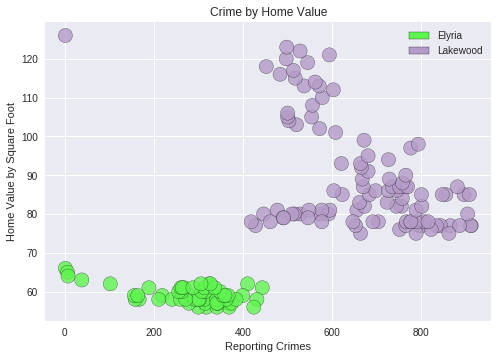

In [0]:
legend_elements = [Patch(facecolor="#5FF550", edgecolor='black',
                         label='Elyria'), 
                  Patch(facecolor="#B49BC8", edgecolor='black',
                         label='Lakewood')]

#creating new variable for category colors
analysis_df['type_colored'] = analysis_df['zip'].replace({44035.0:'#5FF550', 44107.0:'#B49BC8'})

# Build a scatter plot for temperature
plt.scatter(analysis_df["incident_type_primary"], analysis_df["sq_foot_prices"], c=analysis_df['type_colored'], edgecolors="black", alpha=0.8, s=200)

#Incorporate the other graph properties
plt.title("Crime by Home Value")
plt.ylabel("Home Value by Square Foot")
plt.xlabel("Reporting Crimes")
plt.legend(handles=legend_elements, loc='best')

plt.grid(True)


# Show plot
plt.show()  

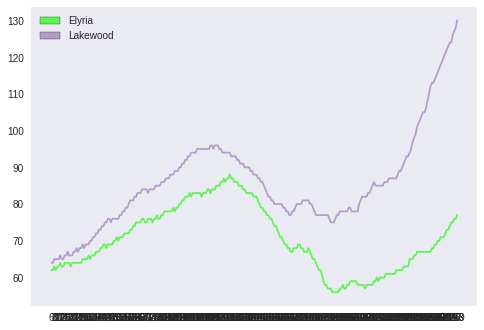

In [0]:
#elyria and lakewood real estate prices
lw_real_estate_plot = plt.plot(home_data_transp['Lakewood_Real_Estate_44107'], color='#B49BC8')
el_real_estate_plot = plt.plot(home_data_transp['Elyria_Real_Estate_44035'], color='#5FF550')
plt.grid(b=None)
plt.legend(handles=legend_elements, loc='best')


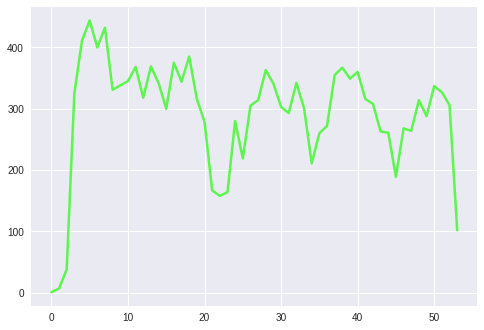

In [0]:
#elyria crime rates
el_crime_data_charting = crime_data_grouped.iloc[4:58,[0,1,2,3]]
el_crime_data_charting = el_crime_data_charting.loc[el_crime_data_charting['zip']==44035.0,:]
el_crime_data_charting = el_crime_data_charting.sort_values(by=['year','month']).reset_index()

#10 week rolling average smoothing
el_crime_data_charting['smoothed_incidents'] = el_crime_data_charting['incident_id'].rolling(window=10).mean()
el_real_estate_plot = plt.plot(el_crime_data_charting['incident_id'], color='#5FF550', linewidth=2.5)

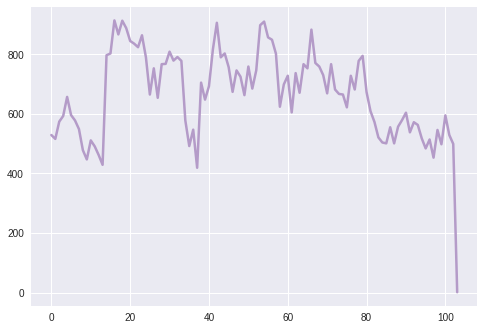

In [0]:
#lakewood crime rates
lw_crime_data_charting = crime_data_grouped.iloc[:,[0,1,2,3]]
lw_crime_data_charting = lw_crime_data_charting.loc[lw_crime_data_charting['zip']==44107.0,:]
lw_crime_data_charting = lw_crime_data_charting.sort_values(by=['year','month']).reset_index()

#10 month rolling average smoothing
lw_crime_data_charting['smoothed_incidents'] = lw_crime_data_charting['incident_id'].rolling(window=10).mean()
lw_real_estate_plot = plt.plot(lw_crime_data_charting['incident_id'], color='#B49BC8', linewidth=2.5)

In [0]:
#lakewood housing and crime correlation coefficient
lakewood_analysis_data = analysis_df.loc[analysis_df['zip']==44107.0,:]
lakewood_analysis_data = lakewood_analysis_data.iloc[:-1]
lakewood_analysis_data['smoothed_incidents'] = lakewood_analysis_data['incident_id'].rolling(window=10).mean()
lakewood_analysis_data['smoothed_prices'] = lakewood_analysis_data['sq_foot_prices'].rolling(window=10).mean()
lakewood_analysis_data['smoothed_prices'].corr(lakewood_analysis_data['smoothed_incidents'])

-0.6322280997597548

In [0]:
#correlation using scipy with p value
lakewood_corr_data = lakewood_analysis_data.dropna()
stats.pearsonr(lakewood_corr_data['smoothed_prices'], lakewood_corr_data['smoothed_incidents'])

(-0.6322280997597549, 8.238299920968855e-12)

In [0]:
#elyria housing and crime correlation coefficient
elyria_analysis_data = analysis_df.loc[analysis_df['zip']==44035.0,:]
elyria_analysis_data = elyria_analysis_data.iloc[4:].reset_index()
elyria_analysis_data['smoothed_incidents'] = elyria_analysis_data['incident_id'].rolling(window=10).mean()
elyria_analysis_data['smoothed_prices'] = elyria_analysis_data['sq_foot_prices'].rolling(window=10).mean()
elyria_analysis_data['smoothed_prices'].corr(elyria_analysis_data['smoothed_incidents'])

-0.45992438304542194

In [0]:
#correlation using scipy with p value
elyria_corr_data = elyria_analysis_data.dropna()
stats.pearsonr(elyria_corr_data['smoothed_prices'], elyria_corr_data['smoothed_incidents'])

(-0.45992438304542205, 0.0013008579790189238)

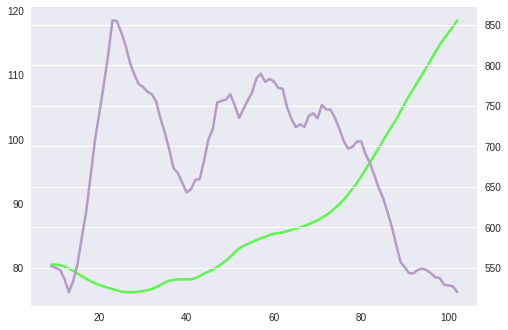

In [0]:
#lakewood real estate and crime rates, dual axis
lw_plot = plt.plot(lakewood_analysis_data['smoothed_prices'], color='#5FF550', linewidth=2.5)   
lw_plot_ax2 = lakewood_analysis_data['smoothed_incidents'].plot(secondary_y=True, color='#B49BC8', linewidth=2.5)
plt.show()

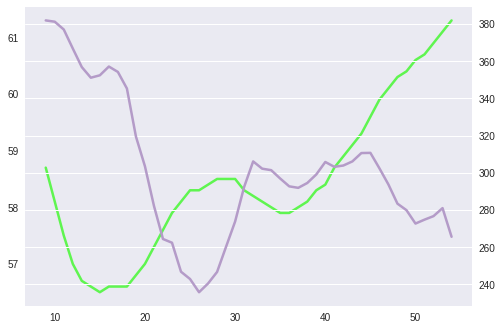

In [0]:
#elyria real estate and crime rates, dual axis
el_plot = plt.plot(elyria_analysis_data['smoothed_prices'], color='#5FF550', linewidth=2.5)   
el_plot_ax2 = elyria_analysis_data['smoothed_incidents'].plot(secondary_y=True, color='#B49BC8', linewidth=2.5)
plt.show()


In [0]:
elyria_analysis_data.head()

,index,month,year,zip,sq_foot_prices,incident_id,incident_datetime,incident_type_primary,city,parent_incident_type,type_colored,smoothed_incidents,smoothed_prices
0,108,4.0,2011.0,44035.0,62.0,325,325,325,325,325,#5FF550,NaN,NaN
1,109,5.0,2011.0,44035.0,62.0,411,411,411,411,411,#5FF550,NaN,NaN
2,110,6.0,2011.0,44035.0,61.0,444,444,444,444,444,#5FF550,NaN,NaN
3,111,7.0,2011.0,44035.0,59.0,400,400,400,400,400,#5FF550,NaN,NaN
4,112,8.0,2011.0,44035.0,58.0,432,432,432,432,432,#5FF550,NaN,NaN


In [0]:
#group incidents by month, year, zip, parent_incident_type
crime_data_grouped_type = crime_data_summary.groupby(['month','year','zip','parent_incident_type']).count().reset_index()

#merge home prices
analysis_type_df = pd.merge(home_prices, crime_data_grouped_type,  how='inner', on=['zip','month','year'])
analysis_type_df = analysis_type_df.rename(columns={'incident_id': 'Count_of_Incidents', 'sq_foot_prices': 'Sq_Foot_Price'})


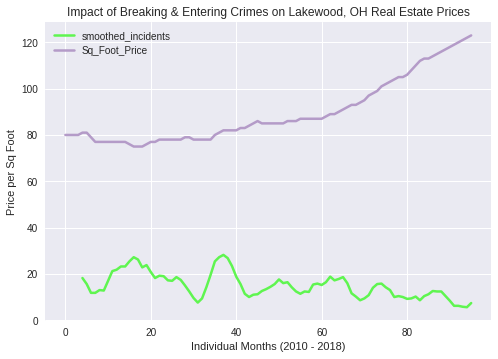

(-0.4795809033057622, 7.663902321558994e-07)

In [0]:
#lakewood crime / real estate prices / breaking and entering
lw_crime_home_data_charting_be = analysis_type_df.iloc[:,[0,1,2,3,4,5]]
lw_crime_home_data_charting_be = lw_crime_home_data_charting_be.loc[lw_crime_home_data_charting_be['parent_incident_type']=='Breaking & Entering']
lw_crime_home_data_charting_be['smoothed_incidents'] = lw_crime_home_data_charting_be['Count_of_Incidents'].rolling(window=5).mean()
lw_crime_home_data_charting_be = lw_crime_home_data_charting_be.loc[lw_crime_home_data_charting_be['zip']==44107.0]
lw_crime_home_data_charting_be = lw_crime_home_data_charting_be.reset_index(drop=True)


#lw real estate and crime rates, dual axis
el_plot = plt.plot(lw_crime_home_data_charting_be['Sq_Foot_Price'], color='#5FF550', linewidth=2.5)   
el_plot_ax2 = lw_crime_home_data_charting_be['smoothed_incidents'].plot(secondary_y=True, color='#B49BC8', linewidth=2.5)
plt.xlabel('Individual Months (2010 - 2018)')
plt.ylabel('Price per Sq Foot')
plt.title('Impact of Breaking & Entering Crimes on Lakewood, OH Real Estate Prices')
plt.show()

#lw correlation
lw_crime_home_data_charting_be['Sq_Foot_Price'].corr(lw_crime_home_data_charting_be['Count_of_Incidents'])
stats.pearsonr(lw_crime_home_data_charting_be['Sq_Foot_Price'], lw_crime_home_data_charting_be['Count_of_Incidents'])

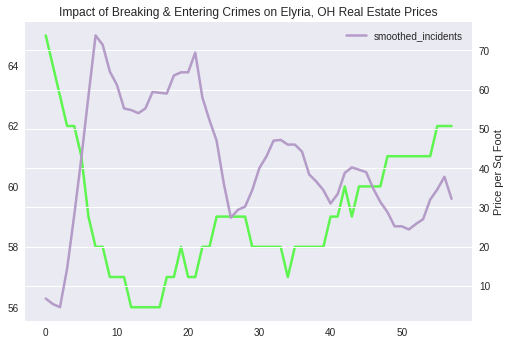

(-0.5339491350515533, 1.5853099666051225e-05)

In [0]:
#elyria crime / real estate prices
e_crime_home_data_charting_be = analysis_type_df.iloc[:,[0,1,2,3,4,5]]
e_crime_home_data_charting_be = e_crime_home_data_charting_be.loc[e_crime_home_data_charting_be['parent_incident_type']=='Breaking & Entering']
e_crime_home_data_charting_be['smoothed_incidents'] = e_crime_home_data_charting_be['Count_of_Incidents'].rolling(window=5).mean()
e_crime_home_data_charting_be = e_crime_home_data_charting_be.loc[e_crime_home_data_charting_be['zip']==44035.0]
e_crime_home_data_charting_be = e_crime_home_data_charting_be.reset_index(drop=True)
e_crime_home_data_charting_be

#elyria plot
lw_plot = plt.plot(e_crime_home_data_charting_be['Sq_Foot_Price'], color='#5FF550', linewidth=2.5)   
lw_plot_ax2 = e_crime_home_data_charting_be['smoothed_incidents'].plot(secondary_y=True, color='#B49BC8', linewidth=2.5)

plt.xlabel('Individual Months (2011 - 2015)')
plt.title('Impact of Breaking & Entering Crimes on Elyria, OH Real Estate Prices')
plt.show()

#elyria correlation
e_crime_home_data_charting_be['Sq_Foot_Price'].corr(e_crime_home_data_charting_be['Count_of_Incidents'])
stats.pearsonr(e_crime_home_data_charting_be['Sq_Foot_Price'], e_crime_home_data_charting_be['Count_of_Incidents'])

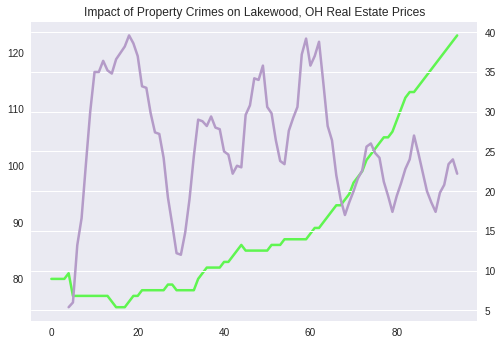

(-0.21639546278728183, 0.03518128711611785)

In [0]:
#lakewood crime / real estate prices / property crimes
lw_crime_home_data_charting_be = analysis_type_df.iloc[:,[0,1,2,3,4,5]]
lw_crime_home_data_charting_be = lw_crime_home_data_charting_be.loc[lw_crime_home_data_charting_be['parent_incident_type']=='Property Crime']
lw_crime_home_data_charting_be['smoothed_incidents'] = lw_crime_home_data_charting_be['Count_of_Incidents'].rolling(window=5).mean()
lw_crime_home_data_charting_be = lw_crime_home_data_charting_be.loc[lw_crime_home_data_charting_be['zip']==44107.0]
lw_crime_home_data_charting_be = lw_crime_home_data_charting_be.reset_index(drop=True)

#lw plot
lw_plot = plt.plot(lw_crime_home_data_charting_be['Sq_Foot_Price'], color='#5FF550', linewidth=2.5)   
lw_plot_ax2 = lw_crime_home_data_charting_be['smoothed_incidents'].plot(secondary_y=True, color='#B49BC8', linewidth=2.5)

plt.xlabel('Individual Months (2010 - 2018)')
plt.title('Impact of Property Crimes on Lakewood, OH Real Estate Prices')
plt.show()

#lw correlation
lw_crime_home_data_charting_be['Sq_Foot_Price'].corr(lw_crime_home_data_charting_be['Count_of_Incidents'])
stats.pearsonr(lw_crime_home_data_charting_be['Sq_Foot_Price'], lw_crime_home_data_charting_be['Count_of_Incidents'])

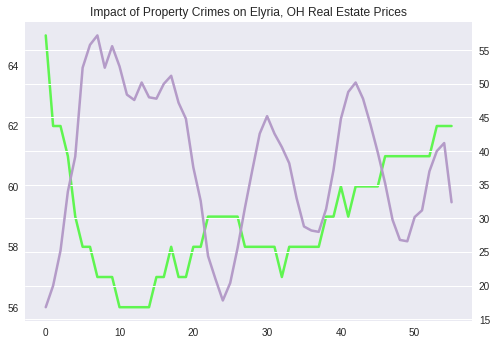

(-0.338450008392495, 0.010729506508050766)

In [0]:
#elyria crime / real estate prices
e_crime_home_data_charting_be = analysis_type_df.iloc[:,[0,1,2,3,4,5]]
e_crime_home_data_charting_be = e_crime_home_data_charting_be.loc[e_crime_home_data_charting_be['parent_incident_type']=='Property Crime']
e_crime_home_data_charting_be['smoothed_incidents'] = e_crime_home_data_charting_be['Count_of_Incidents'].rolling(window=5).mean()
e_crime_home_data_charting_be = e_crime_home_data_charting_be.loc[e_crime_home_data_charting_be['zip']==44035.0]
e_crime_home_data_charting_be = e_crime_home_data_charting_be.reset_index(drop=True)
e_crime_home_data_charting_be

#elyria plot
lw_plot = plt.plot(e_crime_home_data_charting_be['Sq_Foot_Price'], color='#5FF550', linewidth=2.5)   
lw_plot_ax2 = e_crime_home_data_charting_be['smoothed_incidents'].plot(secondary_y=True, color='#B49BC8', linewidth=2.5)
plt.xlabel('Individual Months (2011 - 2015)')
plt.title('Impact of Property Crimes on Elyria, OH Real Estate Prices')
plt.show()

#elyria correlation
e_crime_home_data_charting_be['Sq_Foot_Price'].corr(e_crime_home_data_charting_be['Count_of_Incidents'])
stats.pearsonr(e_crime_home_data_charting_be['Sq_Foot_Price'], e_crime_home_data_charting_be['Count_of_Incidents'])